# Estadística General by M.Sc. Emerson D. Norabuena Figueroa
- Insdustria Car - Repositorio

## 1. Acerca del conjunto de datos

Contexto

El conjunto de datos mtcars es empleada a fin de informar de los atributos que fijan posibles métricas para el analista de datos - junior

Objetivo: Conocer los patrones a partir de la información recopilada para aprender y simular técnicas de análisis de datos sobre un entorno de desarrollo. 
Los atributos de esta base de datos son:

1. model
2. mpg
3. cyl
4. disp
5. hp
6. drat
7. wt
8. qsec
9. vs
10. am
11. gear
12. carb

Contenido

1. Load and check data
2. Data visualization
3. Feature Engineering
4. Modeling Train - Test Split
5. Standarization





In [19]:
# Importación de paquetes

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

from statistics import mode
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

1. Load and check data

In [9]:
datos_iniciales = pd.read_csv('https://raw.githubusercontent.com/Emerson2021/2023/main/mtcars.csv', sep=',')

In [10]:
datos_iniciales.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [11]:
datos_iniciales.shape

(32, 12)

In [12]:
datos_iniciales.info

<bound method DataFrame.info of                   model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4   

In [13]:
print(sum(datos_iniciales.duplicated()))

0


In [14]:
print(datos_iniciales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
None


In [15]:
na_counts = pd.DataFrame(datos_iniciales.isna().sum(),columns=["NA Counts"]).reset_index()
na_counts = na_counts.rename(columns={'index': 'Column Name'})
print(na_counts)

   Column Name  NA Counts
0        model          0
1          mpg          0
2          cyl          0
3         disp          0
4           hp          0
5         drat          0
6           wt          0
7         qsec          0
8           vs          0
9           am          0
10        gear          0
11        carb          0


In [21]:
data.index = pd.RangeIndex(start=1,stop=33, step=1)
datos = datos_iniciales["mpg"]
minimo = min(datos)
maximo = max(datos)
rango = round(maximo - minimo,3)
criterio_sturges = 1+3.32*math.log10(len(datos))

print(f'El valor mínimo es de {minimo}, y el máximo de {maximo} mpg.')
print(f'Por lo que el rango es de {rango} mpg')
print(f'El número sugerido de columnas es de {round(criterio_sturges,2)}')

El valor mínimo es de 10.4, y el máximo de 33.9 mpg.
Por lo que el rango es de 23.5 mpg
El número sugerido de columnas es de 6.0


In [22]:
numero_columnas = 6
minimo = math.floor(min(datos))
maximo = math.ceil(max(datos))
rango = round(maximo - minimo,3)
ancho_intervalo = rango/numero_columnas

j = 1
inicio_interval = []
final_interval = []

while j <= numero_columnas:
    inicio_interval.append(minimo + ancho_intervalo * (j-1))
    final_interval.append(minimo + ancho_intervalo * j)
    j = j + 1
    
tab_frecu = pd.DataFrame({"Inicio":inicio_interval,"Final":final_interval}).round(1)
tab_frecu['Inicio-Final'] = "["+tab_frecu["Inicio"].round(1).astype(str) + " - " + tab_frecu["Final"].round(1).astype(str)+")" 
tab_frecu

limite_bajo = tab_frecu["Inicio"]
limite_alto = tab_frecu["Final"]
valores = datos.copy()

frecuencias3 = []
fila = 0
while fila < len(limite_bajo):
    if fila == (len(limite_bajo)-1):
        x = (valores >= limite_bajo[fila]) & (valores <= limite_alto[fila])
        frecuencias3.append(len(valores[x]))
    else:
        x = (valores >= limite_bajo[fila]) & (valores < limite_alto[fila])
        frecuencias3.append(len(valores[x]))
    fila = fila + 1

tab_frecu["Frecuencia"] = frecuencias3
tab_frecu["Frecuencia Relativa(%)"] = ((tab_frecu["Frecuencia"]/tab_frecu["Frecuencia"].sum())*100).round(3)

fre_rel_acu3 = [] 
for p in range(1,tab_frecu["Inicio"].shape[0]+1):
    fre_rel_acu3.append(tab_frecu["Frecuencia Relativa(%)"].iloc[0:p].sum().round(2))

tab_frecu["Frecuencia Relativa Acumulada(%)"] = fre_rel_acu3
pd.options.display.float_format = '{:.1f}'.format
display(tab_frecu)

,Inicio,Final,Inicio-Final,Frecuencia,Frecuencia Relativa(%),Frecuencia Relativa Acumulada(%)
0,10.0,14.0,[10.0 - 14.0),3,9.4,9.4
1,14.0,18.0,[14.0 - 18.0),10,31.2,40.6
2,18.0,22.0,[18.0 - 22.0),10,31.2,71.9
3,22.0,26.0,[22.0 - 26.0),3,9.4,81.2
4,26.0,30.0,[26.0 - 30.0),2,6.2,87.5
5,30.0,34.0,[30.0 - 34.0),4,12.5,100.0


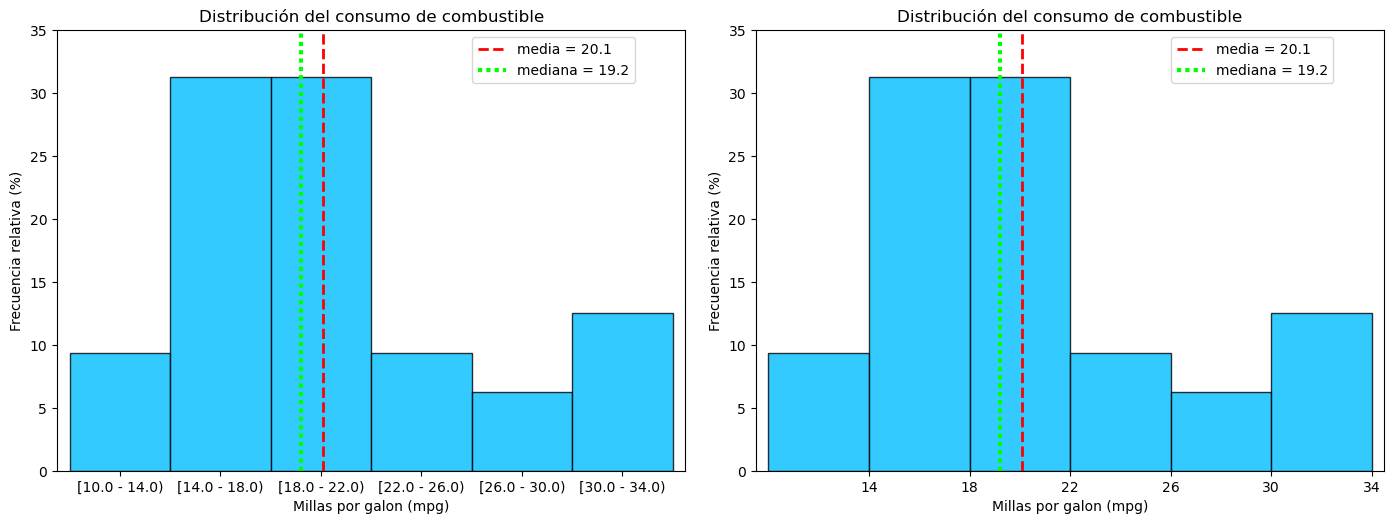

In [23]:
ejeX = (tab_frecu["Inicio"] + tab_frecu["Final"])/2
ejeX2 = tab_frecu["Final"]
ejeY1 = tab_frecu["Frecuencia Relativa(%)"]
etiquetas1 = list(tab_frecu['Inicio-Final'])
titulo = "Distribución del consumo de combustible"
tituloX = "Millas por galon (mpg)"
tituloY = "Frecuencia relativa (%)"
intervalo = ancho_intervalo

fig_doble, axis = plt.subplots(1, 2,figsize=(14,5)) 
fig_doble.tight_layout(w_pad=2)

# Grafico izquierda
axis[0].bar(ejeX,ejeY1,width = intervalo,edgecolor='black',color='deepskyblue',alpha=0.80)
axis[0].vlines(np.mean(datos),0,35,label = f"media = {np.mean(datos).round(1)}",
              color = "red", linestyle = "dashed", linewidth=2 ,alpha = 1)
axis[0].vlines(np.median(datos),0,35,label = f"mediana = {np.median(datos).round(1)}",
              color = "lime", linestyle = (0,(1,1)), linewidth=3 ,alpha = 1)
axis[0].set_ylim(bottom=0,top=35)
axis[0].set_xlim(left=9.5,right=34.5)
axis[0].set_title(titulo)
axis[0].set_xlabel(tituloX)
axis[0].set_ylabel(tituloY)
axis[0].set_xticks(ejeX,etiquetas1)
axis[0].legend(bbox_to_anchor=(.65, 1), loc='upper left')

# Grafico derecha
axis[1].bar(ejeX,ejeY1,width = intervalo,edgecolor='black',color='deepskyblue',alpha=0.80)
axis[1].vlines(np.mean(datos),0,35,label = f"media = {np.mean(datos).round(1)}",
              color = "red", linestyle = "dashed", linewidth=2 ,alpha = 1)
axis[1].vlines(np.median(datos),0,35,label = f"mediana = {np.median(datos).round(1)}",
              color = "lime", linestyle = (0,(1,1)), linewidth=3 ,alpha = 1)
axis[1].set_ylim(bottom=0,top=35)
axis[1].set_xlim(left=9.5,right=34.5)
axis[1].set_title(titulo)
axis[1].set_xlabel(tituloX)
axis[1].set_ylabel(tituloY)
axis[1].set_xticks(ejeX2)
axis[1].legend(bbox_to_anchor=(.65, 1), loc='upper left')
plt.show()

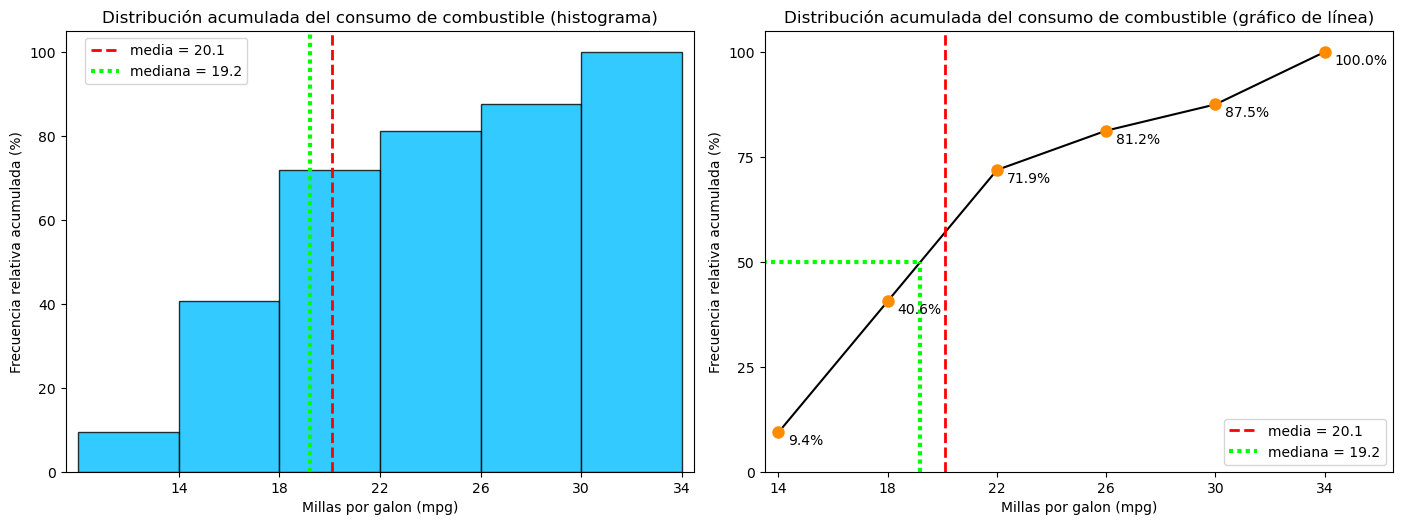

In [27]:
ejeX = (tab_frecu["Inicio"]+tab_frecu["Final"])/2
ejeX2 = tab_frecu["Final"]
ejeY2 = tab_frecu["Frecuencia Relativa Acumulada(%)"]
titulo = "Distribución acumulada del consumo de combustible"
tituloX = "Millas por galon (mpg)"
tituloY = "Frecuencia relativa acumulada (%)"
intervalo = ancho_intervalo
etiquetas2 = list(range(0,125,25))

fig_doble, axis = plt.subplots(1, 2,figsize=(14,5)) 
fig_doble.tight_layout(w_pad=2)

# Grafico izquierda
axis[0].bar(ejeX,ejeY2,width = intervalo,edgecolor='black',color='deepskyblue',alpha=0.80)
axis[0].vlines(np.mean(datos),0,105,label = f"media = {np.mean(datos).round(1)}",
              color = "red", linestyle = "dashed", linewidth=2 ,alpha = 1)
axis[0].vlines(np.median(datos),0,105,label = f"mediana = {np.median(datos).round(1)}",
              color = "lime", linestyle = (0,(1,1)), linewidth=3 ,alpha = 1)


axis[0].set_ylim(bottom=0,top=105)
axis[0].set_xlim(left=9.5,right=34.5)
axis[0].set_title(F'{titulo} (histograma)')
axis[0].set_xlabel(tituloX)
axis[0].set_ylabel(tituloY)
axis[0].set_xticks(ejeX2)
axis[0].legend(bbox_to_anchor=(0.3, 1), loc='upper right')

# Grafico derecha
punto = axis[1].plot(ejeX2,ejeY2,color = "black",linewidth = 1.5)
axis[1].plot(ejeX2,ejeY2,'o', markersize=8,color = "darkorange")

for x, y in zip(ejeX2, ejeY2):
    axis[1].text(x+.35,y-3,'{:.1f}%'.format(y))

axis[1].vlines(np.mean(datos),0,105,label = f"media = {np.mean(datos).round(1)}",
              color = "red", linestyle = "dashed", linewidth=2 ,alpha = 1)
axis[1].vlines(np.median(datos),0,50,label = f"mediana = {np.median(datos).round(1)}",
              color = "lime", linestyle = (0,(1,1)), linewidth=3 ,alpha = 1)
axis[1].hlines(50,0,np.median(datos),color = "lime", linestyle = (0,(1,1)), linewidth=3 ,alpha = 1)

axis[1].set_ylim(bottom=0,top=105)
axis[1].set_xlim(left=13.5,right=36.5)
axis[1].set_title(F'{titulo} (gráfico de línea)')
axis[1].set_xlabel(tituloX)
axis[1].set_ylabel(tituloY)
axis[1].set_xticks(ejeX2)
axis[1].set_yticks(etiquetas2)
axis[1].legend(bbox_to_anchor=(1, 0), loc='lower right')
plt.show()